# Herliana Nur Ekawati
# M07

# Data Loading

Impor library yang akan digunakan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


Download dataset dari kaggle

In [ ]:
!kaggle datasets download -d hariprabu/medical-insurance

  0% 0.00/13.4k [00:00<?, ?B/s]
100% 13.4k/13.4k [00:00<00:00, 8.94MB/s]


Mengekstrak file zip

In [ ]:
!mkdir insurance
!unzip -qq medical-insurance.zip -d insurance
!ls insurance

med-insurance.csv


Membaca file csv

In [ ]:
hospital = pd.read_csv('/content/insurance/med-insurance.csv')
hospital

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# Deskripsi Variabel

In [ ]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
hospital.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
hospital.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

# Univariate Analysis

Sampel data dibagi menjadi 2 fitur, Numerical Features dan Categorical Features

In [ ]:
numerical_features = ['age', 'bmi', 'children', 'expenses']
categorical_features = ['sex', 'smoker', 'region']

Menampilkan Grafik Sex

        Jumlah Sampel  Persentase
male              676        50.5
female            662        49.5


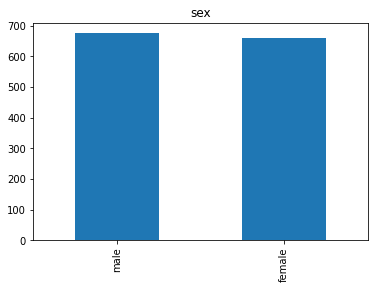

In [ ]:
feature = categorical_features[0]
count = hospital[feature].value_counts()
percent = 100*hospital[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Menampilkan Grafik Smoker

     Jumlah Sampel  Persentase
no            1064        79.5
yes            274        20.5


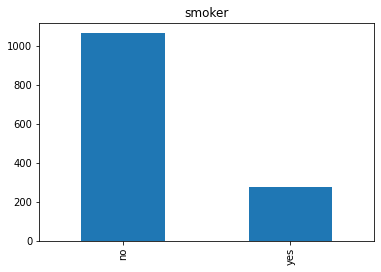

In [ ]:
feature = categorical_features[1]
count = hospital[feature].value_counts()
percent = 100*hospital[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Menampilkan Grafik Region

           Jumlah Sampel  Persentase
southeast            364        27.2
southwest            325        24.3
northwest            325        24.3
northeast            324        24.2


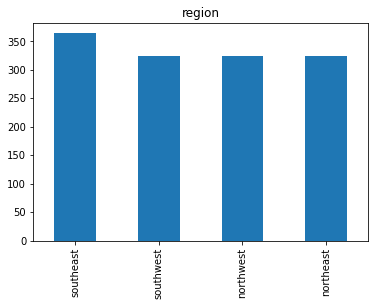

In [ ]:
feature = categorical_features[2]
count = hospital[feature].value_counts()
percent = 100*hospital[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah Sampel':count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Menampilkan Grafik Numerical

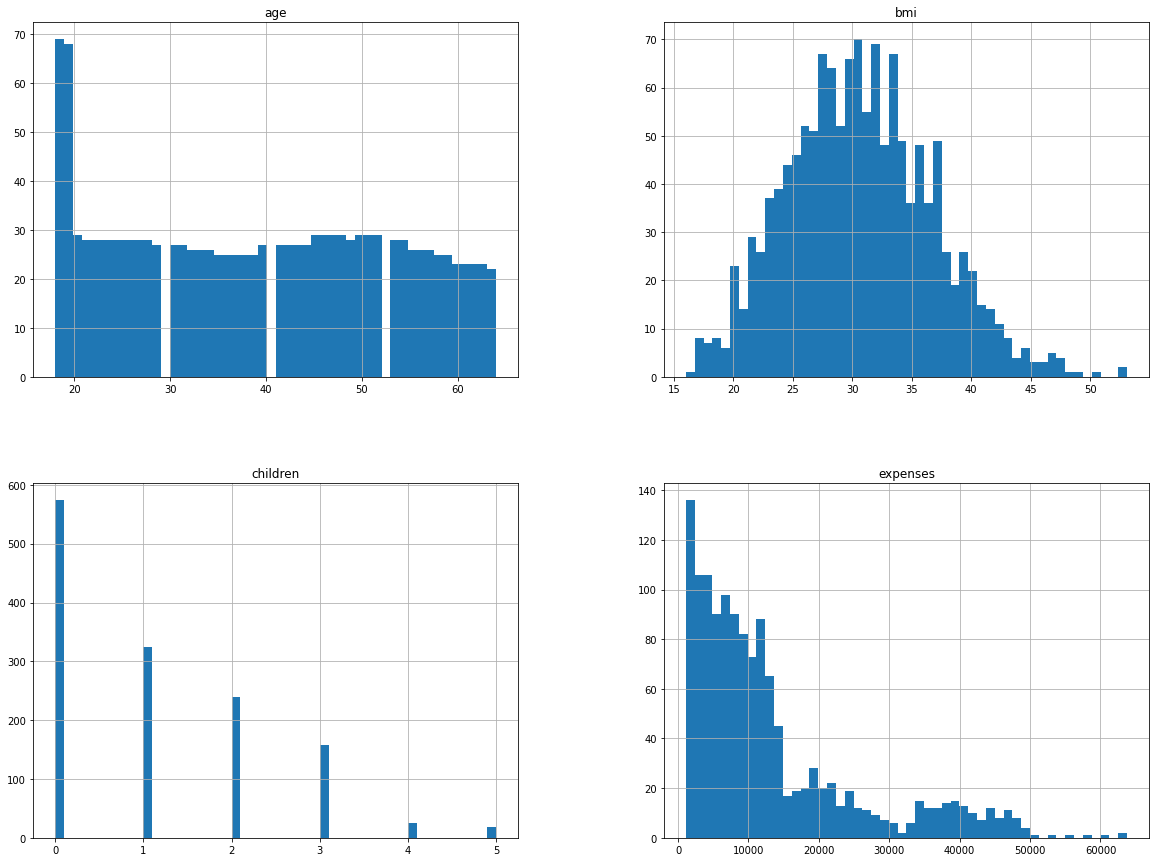

In [ ]:
hospital.hist(bins=50, figsize=(20,15))
plt.show()

# Multivariate Analysis

Categorical Features

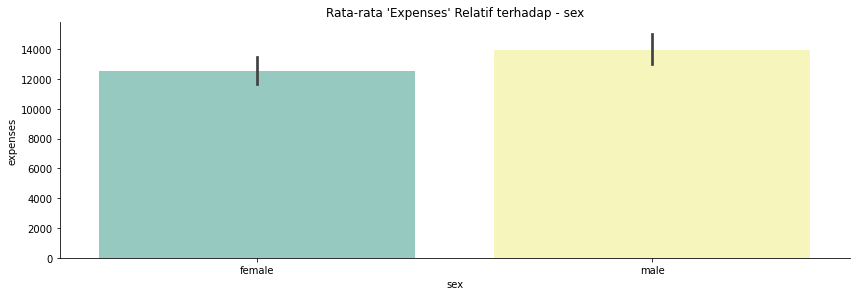

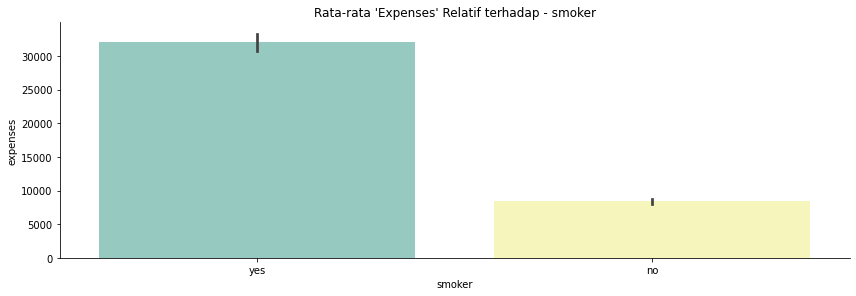

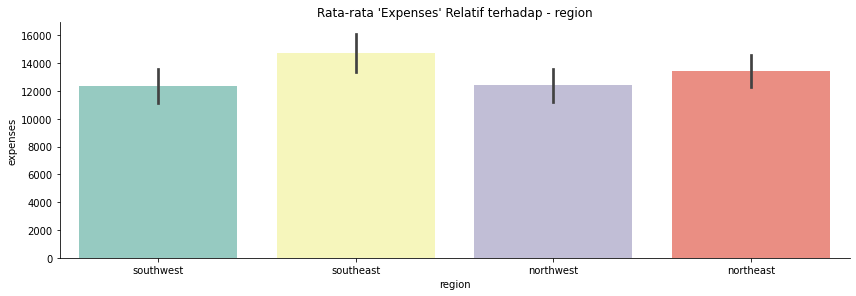

In [ ]:
cat_features = hospital.select_dtypes(include = 'object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='expenses', kind='bar', dodge=False, height = 4, aspect = 3, data=hospital, palette='Set3')
  plt.title("Rata-rata 'Expenses' Relatif terhadap - {}".format(col))

Numerical Features

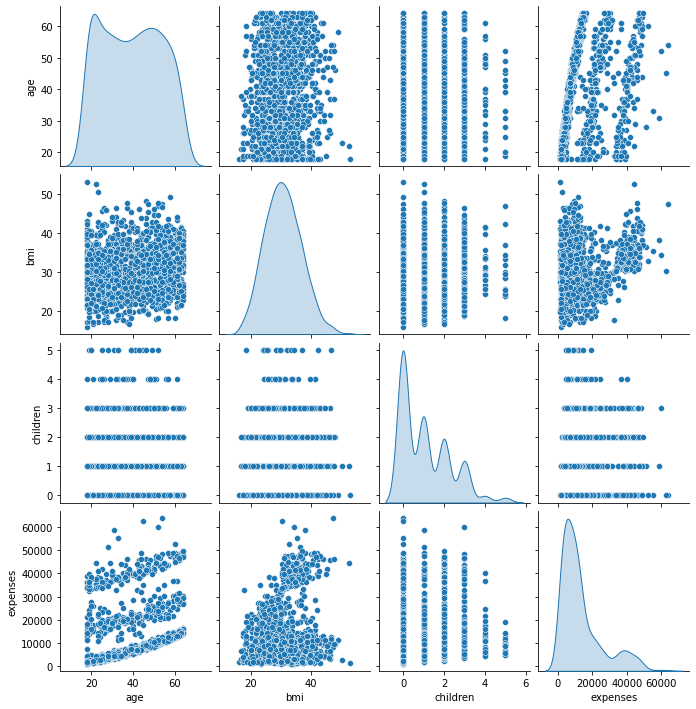

In [ ]:
sns.pairplot(hospital, diag_kind = 'kde')

Korelasi Matriks untuk Fitur Numerik

Text(0.5, 1.0, 'Korelasi Matriks untuk Fitur Numerik')

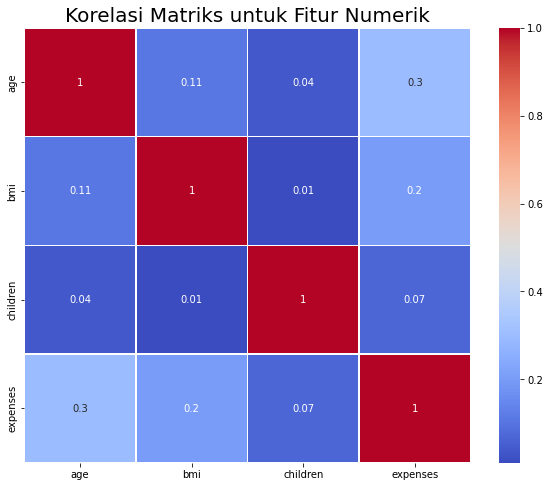

In [ ]:
plt.figure(figsize=(10,8))
correlation_matrix = hospital.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi Matriks untuk Fitur Numerik", size=20)

# Data Preparation

In [ ]:
from sklearn.preprocessing import OneHotEncoder
hospital = pd.concat([hospital, pd.get_dummies(hospital['sex'], prefix='sex')], axis=1)
hospital = pd.concat([hospital, pd.get_dummies(hospital['smoker'], prefix='smoker')], axis=1)
hospital = pd.concat([hospital, pd.get_dummies(hospital['region'], prefix='region')], axis=1)

Korelasi Matriks untuk Seluruh Fitur

Text(0.5, 1.0, 'Korelasi Matriks untuk Seluruh Fitur')

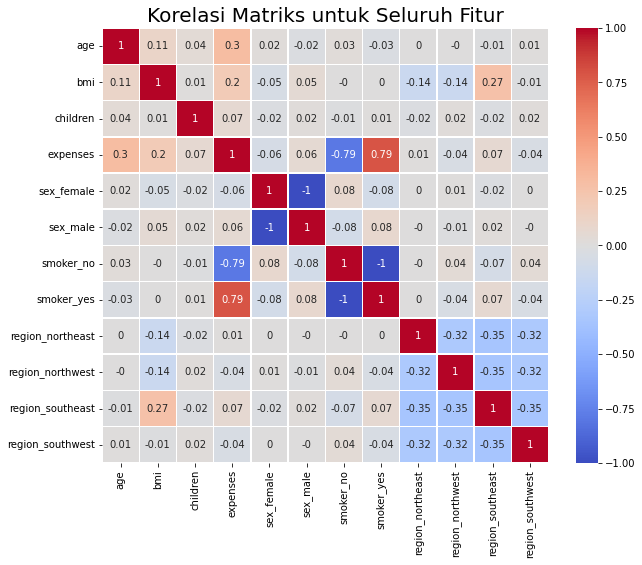

In [ ]:
plt.figure(figsize=(10, 8))
corr = hospital.corr().round(2)
sns.heatmap(data=corr, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Korelasi Matriks untuk Seluruh Fitur", size=20)

In [ ]:
hospital.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)
hospital

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,1,0,0,1,0,0
1334,18,31.9,0,2205.98,1,0,1,0,1,0,0,0
1335,18,36.9,0,1629.83,1,0,1,0,0,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0,0,0,0,1


In [ ]:
x = hospital.drop(['expenses'], axis=1)
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,1,1,0,0,1,0,0
1334,18,31.9,0,1,0,1,0,1,0,0,0
1335,18,36.9,0,1,0,1,0,0,0,1,0
1336,21,25.8,0,1,0,1,0,0,0,0,1


Hapus kolom region karena tidak dibutuhkan

In [ ]:
x_test = x.drop(['region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1)
x_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.9,0,1,0,0,1
1,18,33.8,1,0,1,1,0
2,28,33.0,3,0,1,1,0
3,33,22.7,0,0,1,1,0
4,32,28.9,0,0,1,1,0
...,...,...,...,...,...,...,...
1333,50,31.0,3,0,1,1,0
1334,18,31.9,0,1,0,1,0
1335,18,36.9,0,1,0,1,0
1336,21,25.8,0,1,0,1,0


Pisahkan fitur expenses menjadi y

In [ ]:
y = hospital['expenses']
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200)

Mengecek jumlah sampel pada masing-masing bagian

In [ ]:
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 1338
Total # of sample in train dataset: 1070
Total # of sample in test dataset: 268


Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(x_train[numerical_features])
x_train[numerical_features] = scaler.transform(x_train.loc[:, numerical_features])
x_train[numerical_features].head()

,age,bmi,children
225,1.161940,0.541574,1.570438
420,1.812756,0.541574,-0.901904
853,1.017314,-1.140263,0.746324
289,0.945001,-0.707314,1.570438
147,0.872688,1.174344,-0.077790


Mengecek nilai mean dan standar deviasi pada setelah proses standarisasi

In [ ]:
x_train[numerical_features].describe().round(4)

,age,bmi,children
count,1070.0000,1070.0000,1070.0000
mean,-0.0000,-0.0000,-0.0000
std,1.0005,1.0005,1.0005
min,-1.5136,-2.4391,-0.9019
25%,-0.8628,-0.7073,-0.9019
50%,0.0049,-0.0412,-0.0778
75%,0.8727,0.6373,0.7463
max,1.8128,3.2891,3.2187


# Model Development

Dataframe untuk analisis model

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

Melatih data KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train, y_train)

models.loc['train_mse', 'knn'] = mean_squared_error(y_pred = knn.predict(x_train), y_true=y_train)

Model development dengan RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(x_train), y_true=y_train)

Model development dengan Boosting Algorithm

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(x_train, y_train)
models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(x_train), y_true=y_train)

# Evaluasi Model

Proses Scaling

In [ ]:
x_test.loc[:, numerical_features] = scaler.transform(x_test[numerical_features])

Evaluasi ketiga model dengan metrik MSE

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))/1e3

mse

,train,test
KNN,30064.576543,39220.122427
RF,3791.412142,22034.478805
Boosting,21482.520677,22608.716112


Plot metrik dengan bar chart

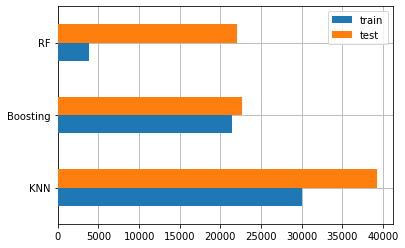

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Uji

In [ ]:
prediksi = x_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
  pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
992,10118.42,12328.2,10616.4,13157.5


Menghitung nilai R2 Score

In [ ]:
from sklearn.metrics import r2_score
knn_test_pred = knn.predict(x_test)
forest_test_pred = RF.predict(x_test)
boosting_test_pred = boosting.predict(x_test)

print("R2 score KNN : ", r2_score(y_test, knn_test_pred))
print("R2 score RF : ", r2_score(y_test, forest_test_pred))
print("R2 score Boosting : ", r2_score(y_test, knn_test_pred))

R2 score KNN :  0.7494154894917251
R2 score RF :  0.8592176988797552
R2 score Boosting :  0.7494154894917251
